In [1]:
import numpy as np
import object 

Linear transformations visualization on McDonald's Logo

In [2]:
# McDonald's Logo coordinates are generated by Chat GPT 4.o
mcdonalds_logo_vectors = np.array([
    # Left arch (from bottom left to top of the first arch)
    [-2.5, 0], [-2.25, 2.5], [-2, 4], [-1.75, 5], [-1.5, 6],
    [-1.25, 6.5], [-1, 6.75], [-0.5, 6.75], [-0.25, 6.5],
    [0, 6], [0.25, 5], [0.5, 4], [0.75, 2.5], [1, 1],
    # Right arch (from bottom of the first arch to top of the second arch)
    [1, 1], [1.25, 2.5], [1.5, 4], [1.75, 5], [2, 6],
    [2.25, 6.5], [2.5, 6.75], [3, 6.75], [3.25, 6.5],
    [3.5, 6], [3.75, 5], [4, 4], [4.25, 2.5], [4.5, 0]

])
mcdonalds_obj = object.Object(mcdonalds_logo_vectors, "McDonald's Logo")

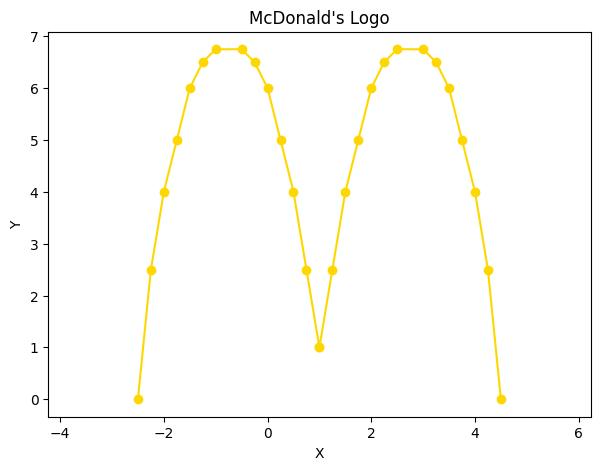

In [3]:
mcdonalds_obj.plot('gold')

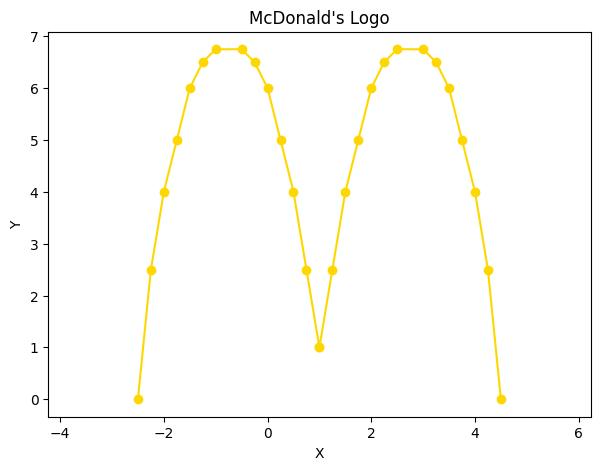

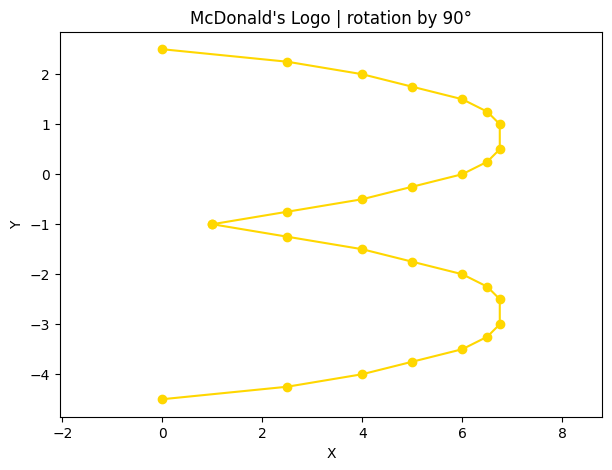

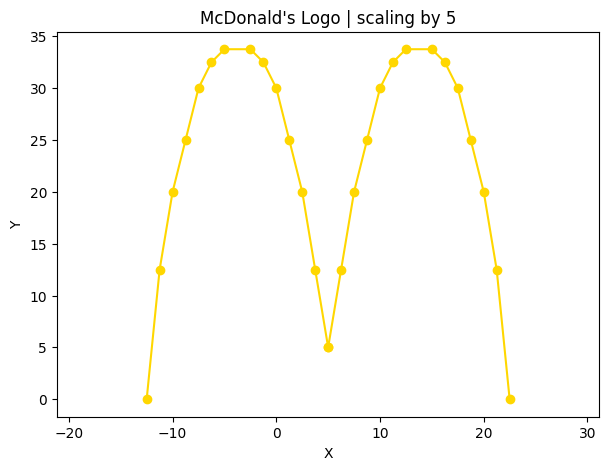

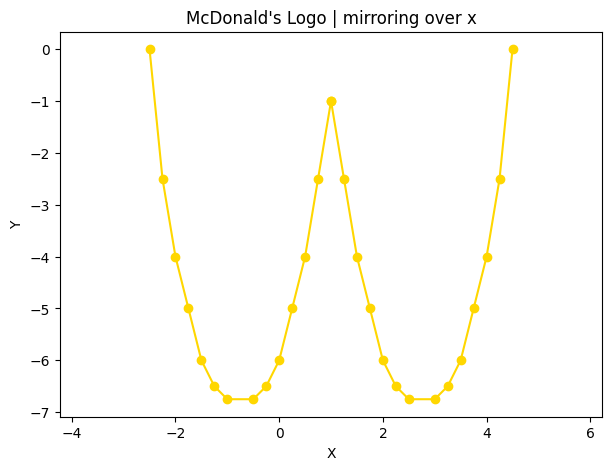

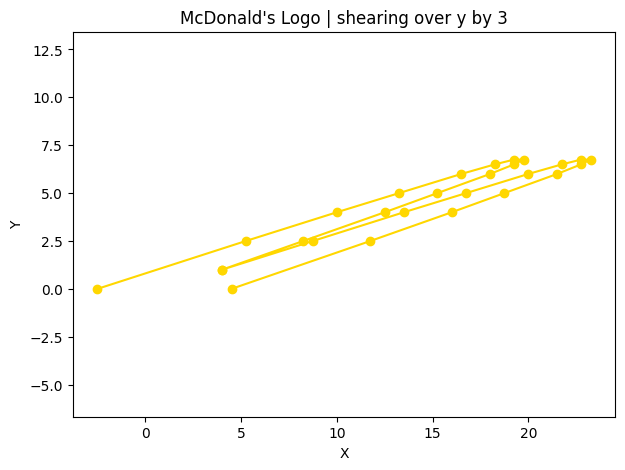

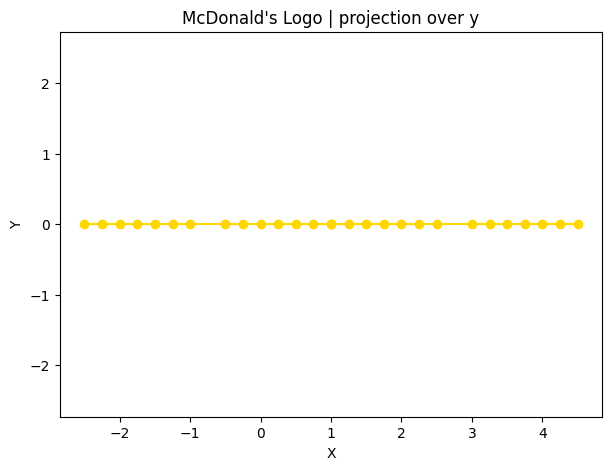

In [4]:
mcdonalds_obj.plot('gold')
mcdonalds_obj.rotate(90).plot('gold')
mcdonalds_obj.scale(5).plot('gold')
mcdonalds_obj.mirror('x').plot('gold')
mcdonalds_obj.shear(3, 'y').plot('gold')
mcdonalds_obj.project('y').plot('gold')

In [5]:
# Nike 'Swoosh' Logo coordinates are obrained imperically by Kira Zholtikova
nike_swoosh_vectors = np.array([
    [1.5, 9], [0.5, 7.75], [0.25, 7], [0, 6], [0.25, 5.5],
    [1, 5.25], [3.75, 6.25], [11, 9.5], [1.75, 6.75], [1.25, 7], [1.5, 9]
])
nike_obj = object.Object(nike_swoosh_vectors, "Nike 'Swoosh' Logo")

Experiments with Nike 'Swoosh' Logo

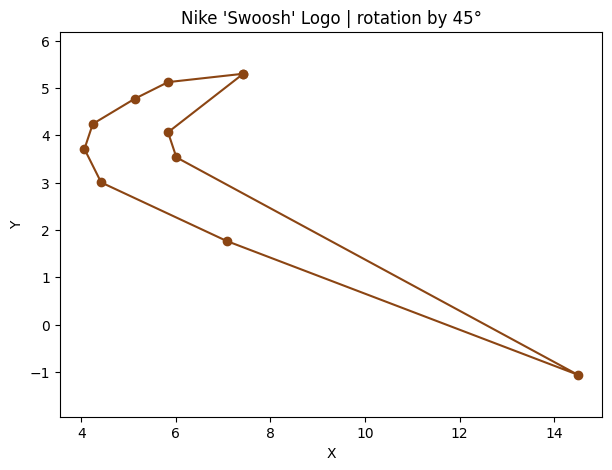

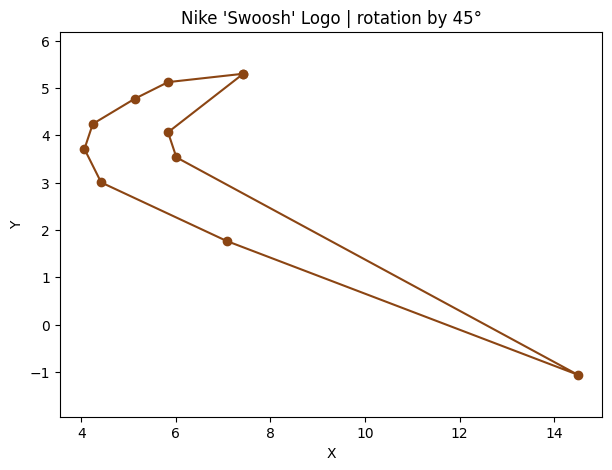

In [6]:
nike_obj.rotate(45, 'x').plot('saddlebrown') 
nike_obj.rotate(45, 'y').plot('saddlebrown') # in 2d pivot-axis doesn't affect the result

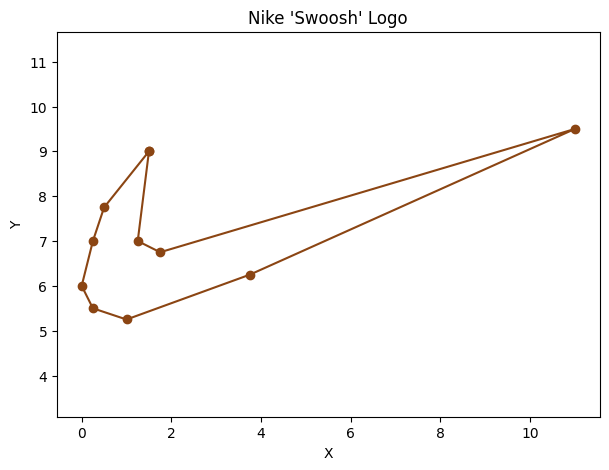

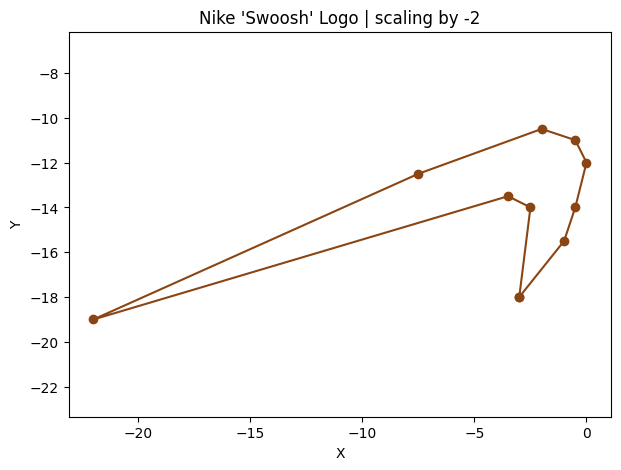

In [7]:
nike_obj.plot('saddlebrown')
nike_obj.scale(-2).plot('saddlebrown') # Negative scaling includes mirroring relative to the origin

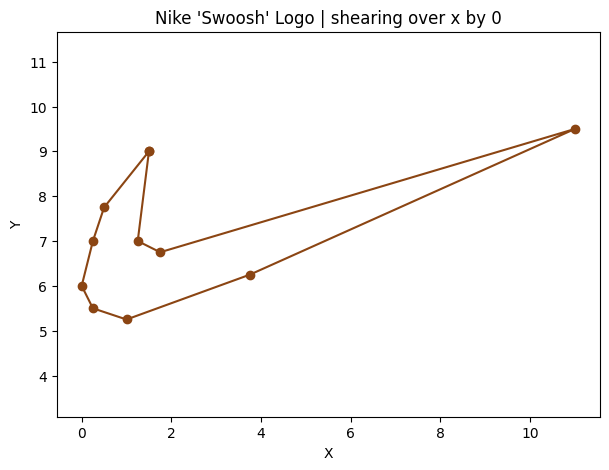

In [ ]:
nike_obj.shear(0, 'x').plot('saddlebrown') # shearing by zero doesn't change the object (A*I)
nike_obj.shear(1, 'y').plot('saddlebrown')
nike_obj.shear(-1, 'y').plot('saddlebrown') # shearing by negative value moves the object to the right instead of the left

In [ ]:
nike_obj.mirror('y').shear(2, 'x').plot('saddlebrown')
nike_obj.shear(2, 'x').mirror('y').plot('saddlebrown') # the order of transformations matter

In [ ]:
nike_obj.rotate(45).scale(3).plot('saddlebrown')
nike_obj.scale(3).rotate(45).plot('saddlebrown') # though not always

Inverse transformations

In [ ]:
nike_obj.rotate(60).rotate(-60).plot('saddlebrown')
nike_obj.scale(2).scale(0.5).plot('saddlebrown')
nike_obj.shear(2, 'x').shear(-2, 'x').plot('saddlebrown')
nike_obj.mirror('y').mirror('y').plot('saddlebrown')
nike_obj.project('x').plot('saddlebrown') # no inverse transformation for projection

Comparing my linear transformations results with those from OpenCV library

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
nike_swoosh_vectors_reshaped = np.array([[x] for x in nike_swoosh_vectors])

In [ ]:
nike_obj.rotate(45).plot('saddlebrown')

transformed_vectors = cv.transform(nike_swoosh_vectors_reshaped, cv.getRotationMatrix2D((0, 0), 45, 1)[:, :2])
plt.axis('equal')
plt.plot(*transformed_vectors.reshape(-1, 2).T, color='saddlebrown', marker='o')

In [ ]:
nike_obj.scale(4).plot('saddlebrown')

transformed_vectors = cv.transform(nike_swoosh_vectors_reshaped, cv.getRotationMatrix2D((0, 0), 0, 4)[:, :2])
plt.axis('equal')
plt.plot(*transformed_vectors.reshape(-1, 2).T, color='saddlebrown', marker='o')

In [ ]:
nike_obj.mirror('x').plot('saddlebrown')
# ??? OpenCV doesn't have a built-in function for mirroring
transformed_vectors = cv.transform(nike_swoosh_vectors_reshaped, np.array([[1, 0], [0, -1]]))

plt.axis('equal')
plt.plot(*transformed_vectors.reshape(-1, 2).T, color='saddlebrown', marker='o')

In [ ]:
nike_obj.shear(1, 'x').plot('saddlebrown')
# ??? OpenCV doesn't have a built-in function for shearing
transformed_vectors = cv.transform(nike_swoosh_vectors_reshaped, np.array([[1, 0], [1, 1]]))
plt.axis('equal')
plt.plot(*transformed_vectors.reshape(-1, 2).T, color='saddlebrown', marker='o')


In [ ]:
nike_obj.project('y').plot('saddlebrown')
# ??? OpenCV doesn't have a built-in function for building projections
transformed_vectors = cv.transform(nike_swoosh_vectors_reshaped, np.array([[1, 0], [0, 0]]))
plt.axis('equal')
plt.plot(*transformed_vectors.reshape(-1, 2).T, color='saddlebrown', marker='o')